##### **Decision Tree** Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

In [18]:
df = pd.read_csv('C:\Harish\DATA SCIENCE COURSE\Course\Major Projects\House Price Prediction\data\processed\processed_data_with_features.csv')
print(df.shape)

(2930, 75)


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\bhmrk\AppData\Local\Temp\ipykernel_37256\956113949.py:1: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv('C:\Harish\DATA SCIENCE COURSE\Course\Major Projects\House Price Prediction\data\processed\processed_data_with_features.csv')


In [19]:
drop_columns = [col for col in ['SalePrice', 'PID', 'Order'] if col in df.columns]


In [20]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
X = df.drop(columns=drop_columns, errors='ignore')
y = df['SalePrice']

In [22]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
y_pred_dt = dt_model.predict(X_test)

In [26]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [27]:
print("Decision Tree Regression Results:")
print(f"RMSE: {rmse_dt:.2f}")
print(f"MAE : {mae_dt:.2f}")
print(f"R²  : {r2_dt:.2f}")

Decision Tree Regression Results:
RMSE: 38002.78
MAE : 23036.05
R²  : 0.82


#### **Decision Tree Regressor** Plots

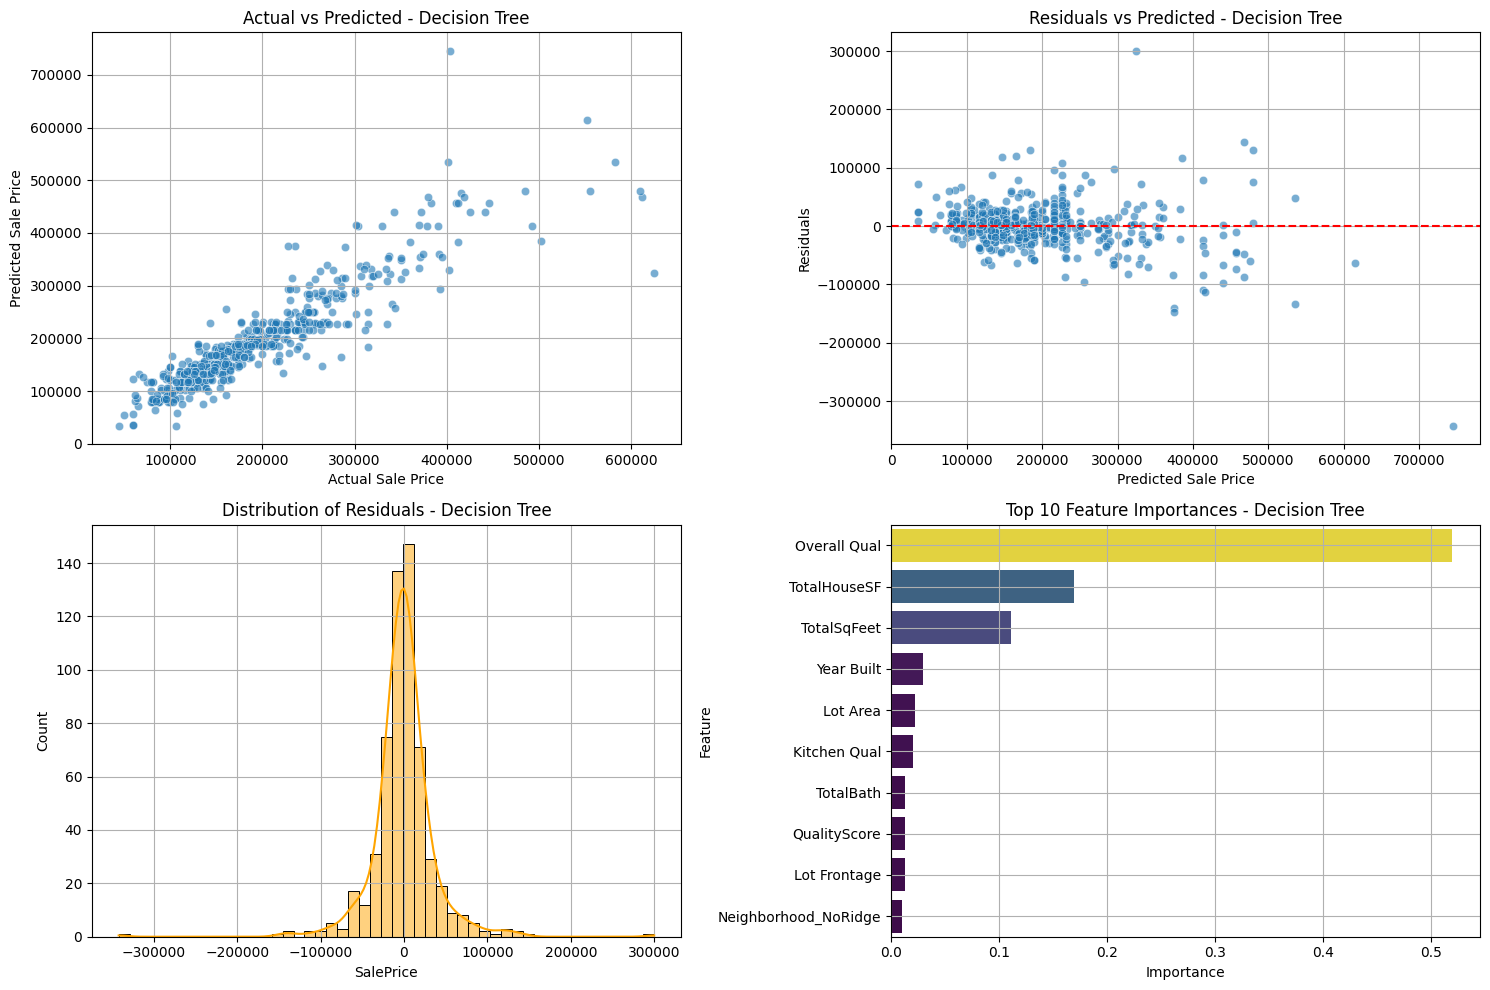

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

# ✅ 1. Actual vs Predicted
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted - Decision Tree")
plt.grid(True)

# ✅ 2. Residuals Plot
residuals_dt = y_test - y_pred_dt

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_dt, y=residuals_dt, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - Decision Tree")
plt.grid(True)

# ✅ 3. Distribution of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals_dt, kde=True, color='orange')
plt.title("Distribution of Residuals - Decision Tree")
plt.grid(True)

# ✅ 4. Feature Importance
plt.subplot(2, 2, 4)
importances = dt_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_feats = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Add a hue column for consistent coloring and avoid FutureWarning
top_feats['Hue'] = top_feats['Importance']

sns.barplot(
    x='Importance',
    y='Feature',
    hue='Hue',
    data=top_feats,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Feature Importances - Decision Tree")
plt.grid(True)

plt.tight_layout()
plt.show()


#### **Random Forest Regressor** model

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred_rf = rf_model.predict(X_test)

In [33]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [34]:
print("Random Forest Regression Results:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE : {mae_rf:.2f}")
print(f"R²  : {r2_rf:.2f}")

Random Forest Regression Results:
RMSE: 27077.15
MAE : 15761.24
R²  : 0.91


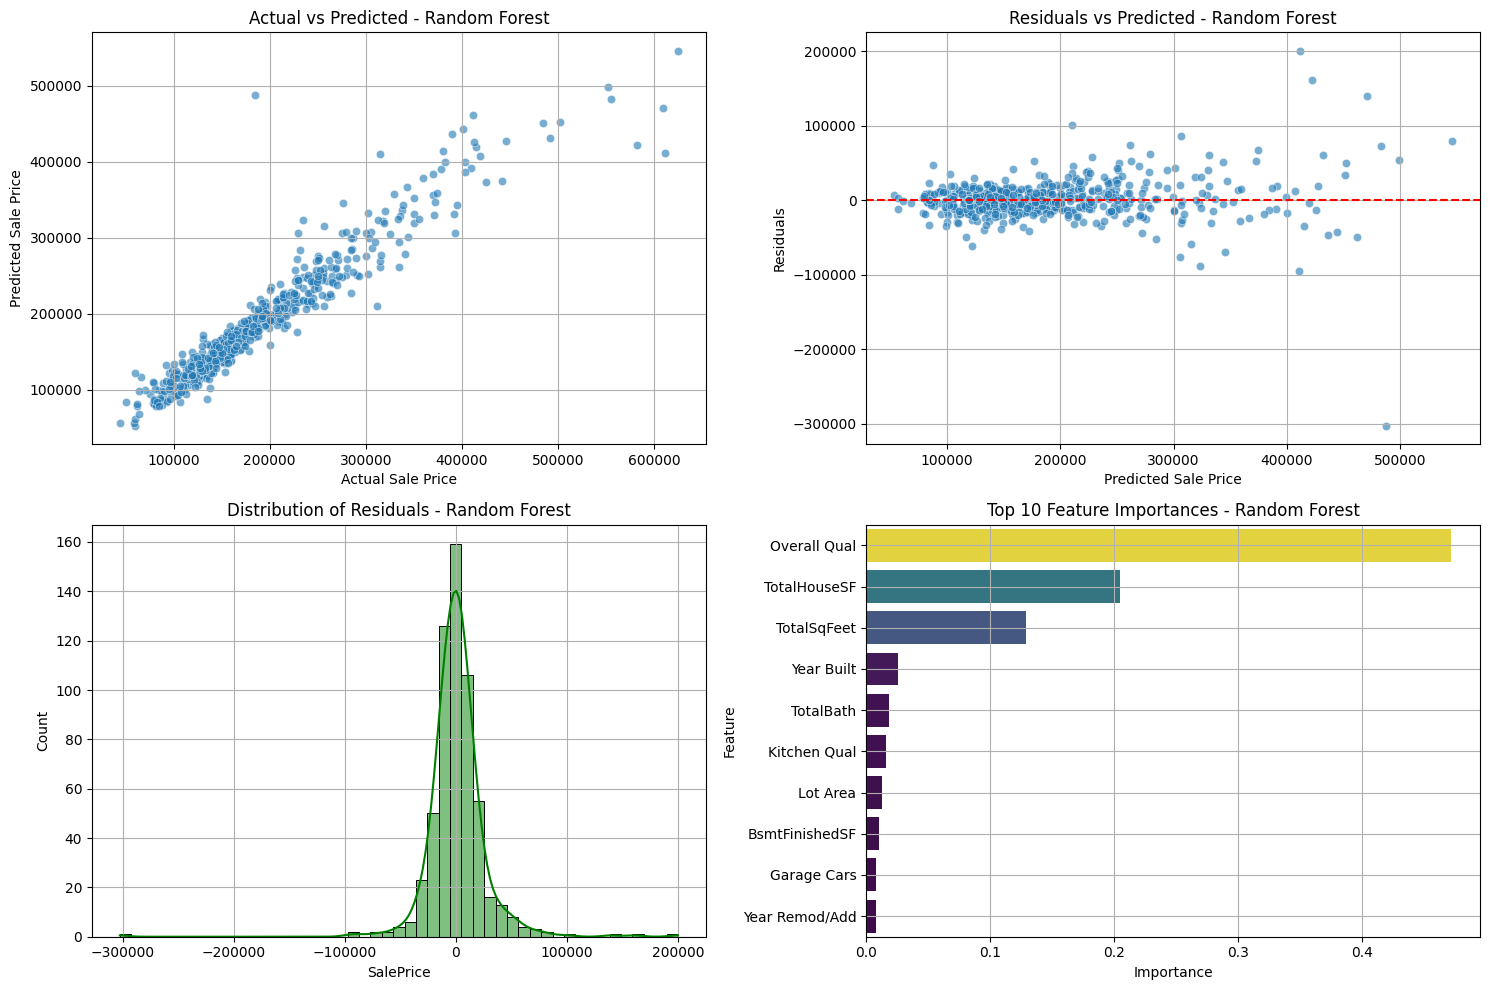

In [35]:
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted - Random Forest")
plt.grid(True)

# 2. Residuals Plot
residuals_rf = y_test - y_pred_rf
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - Random Forest")
plt.grid(True)

# 3. Distribution of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals_rf, kde=True, color='green')
plt.title("Distribution of Residuals - Random Forest")
plt.grid(True)

# 4. Feature Importance
plt.subplot(2, 2, 4)
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_feats = importance_df.sort_values(by='Importance', ascending=False).head(10)
top_feats['Hue'] = top_feats['Importance']

sns.barplot(
    x='Importance',
    y='Feature',
    hue='Hue',
    data=top_feats,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Feature Importances - Random Forest")
plt.grid(True)

plt.tight_layout()
plt.show()

#### **Gradient Boosting** model

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gbr_model = GradientBoostingRegressor(n_estimators = 200, learning_rate=0.1, random_state=42, max_depth=4)
gbr_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [38]:
y_pred_gbr = gbr_model.predict(X_test)

In [39]:
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regression Results:")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"MAE : {mae_gbr:.2f}")
print(f"R²  : {r2_gbr:.2f}")

Gradient Boosting Regression Results:
RMSE: 25497.72
MAE : 14246.82
R²  : 0.92


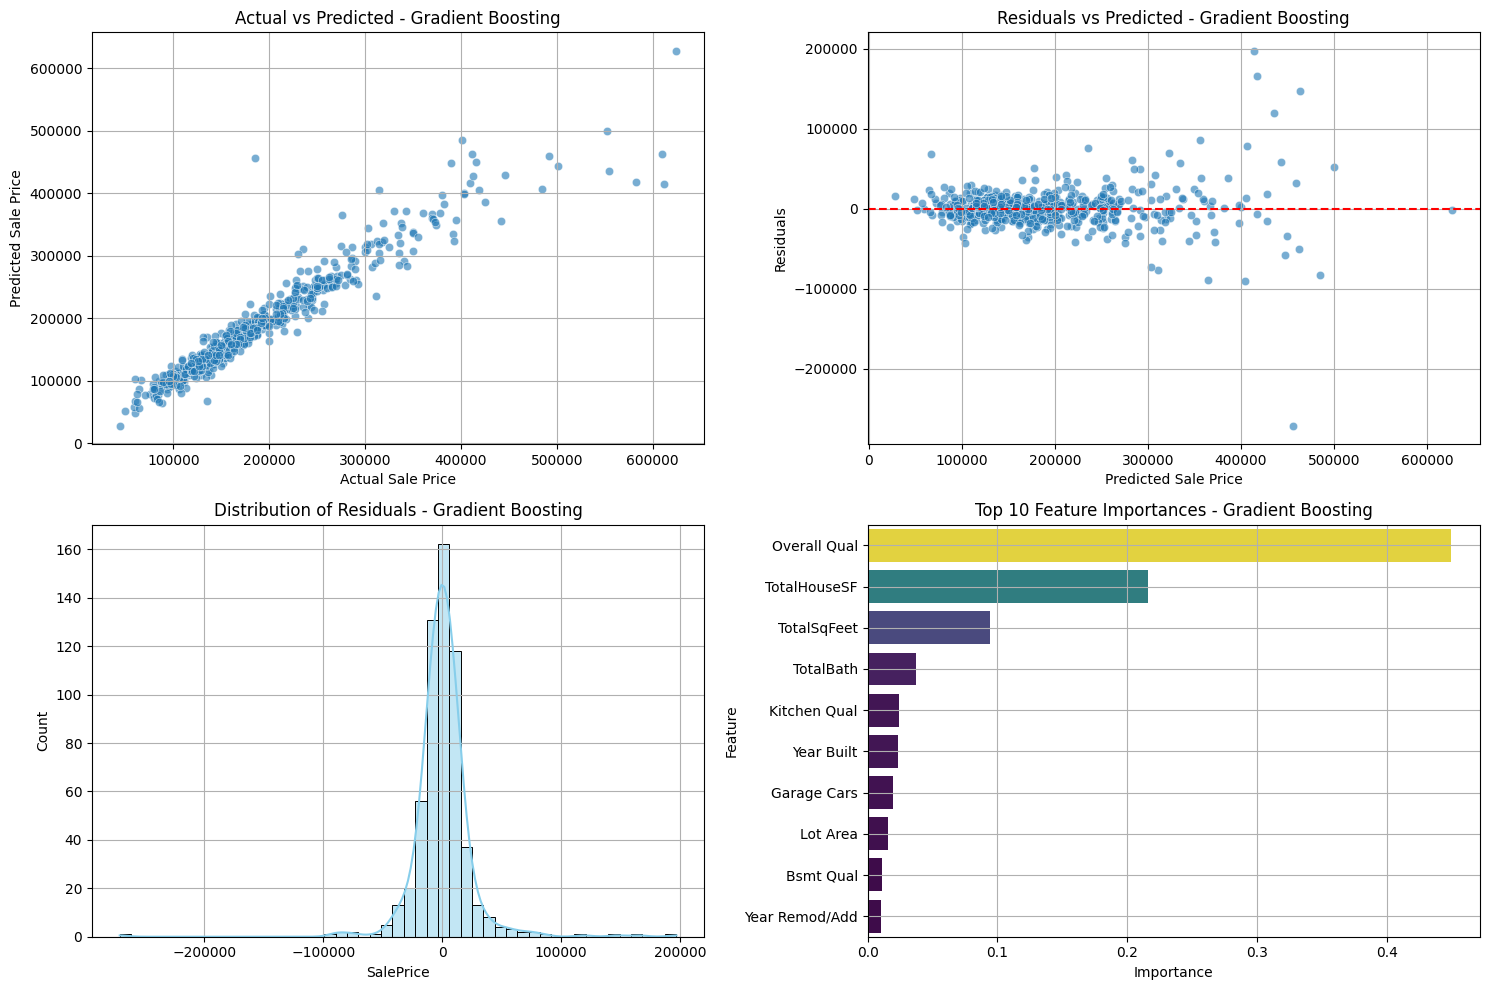

In [40]:
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_gbr, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted - Gradient Boosting")
plt.grid(True)

# 2. Residuals
residuals_gbr = y_test - y_pred_gbr
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_gbr, y=residuals_gbr, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - Gradient Boosting")
plt.grid(True)

# 3. Residual Distribution
plt.subplot(2, 2, 3)
sns.histplot(residuals_gbr, kde=True, color='skyblue')
plt.title("Distribution of Residuals - Gradient Boosting")
plt.grid(True)

# 4. Feature Importances
plt.subplot(2, 2, 4)
importances = gbr_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_feats = importance_df.sort_values(by='Importance', ascending=False).head(10)
top_feats['Hue'] = top_feats['Importance']

sns.barplot(
    x='Importance',
    y='Feature',
    hue='Hue',
    data=top_feats,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.grid(True)

plt.tight_layout()
plt.show()


#### **XGBoost Regressor** model

In [41]:
from xgboost import XGBRegressor

In [42]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, max_depth=4)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [43]:
y_pred_xgb = xgb_model.predict(X_test)

In [44]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Results:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE : {mae_xgb:.2f}")
print(f"R²  : {r2_xgb:.2f}")

XGBoost Regression Results:
RMSE: 23895.88
MAE : 14357.24
R²  : 0.93


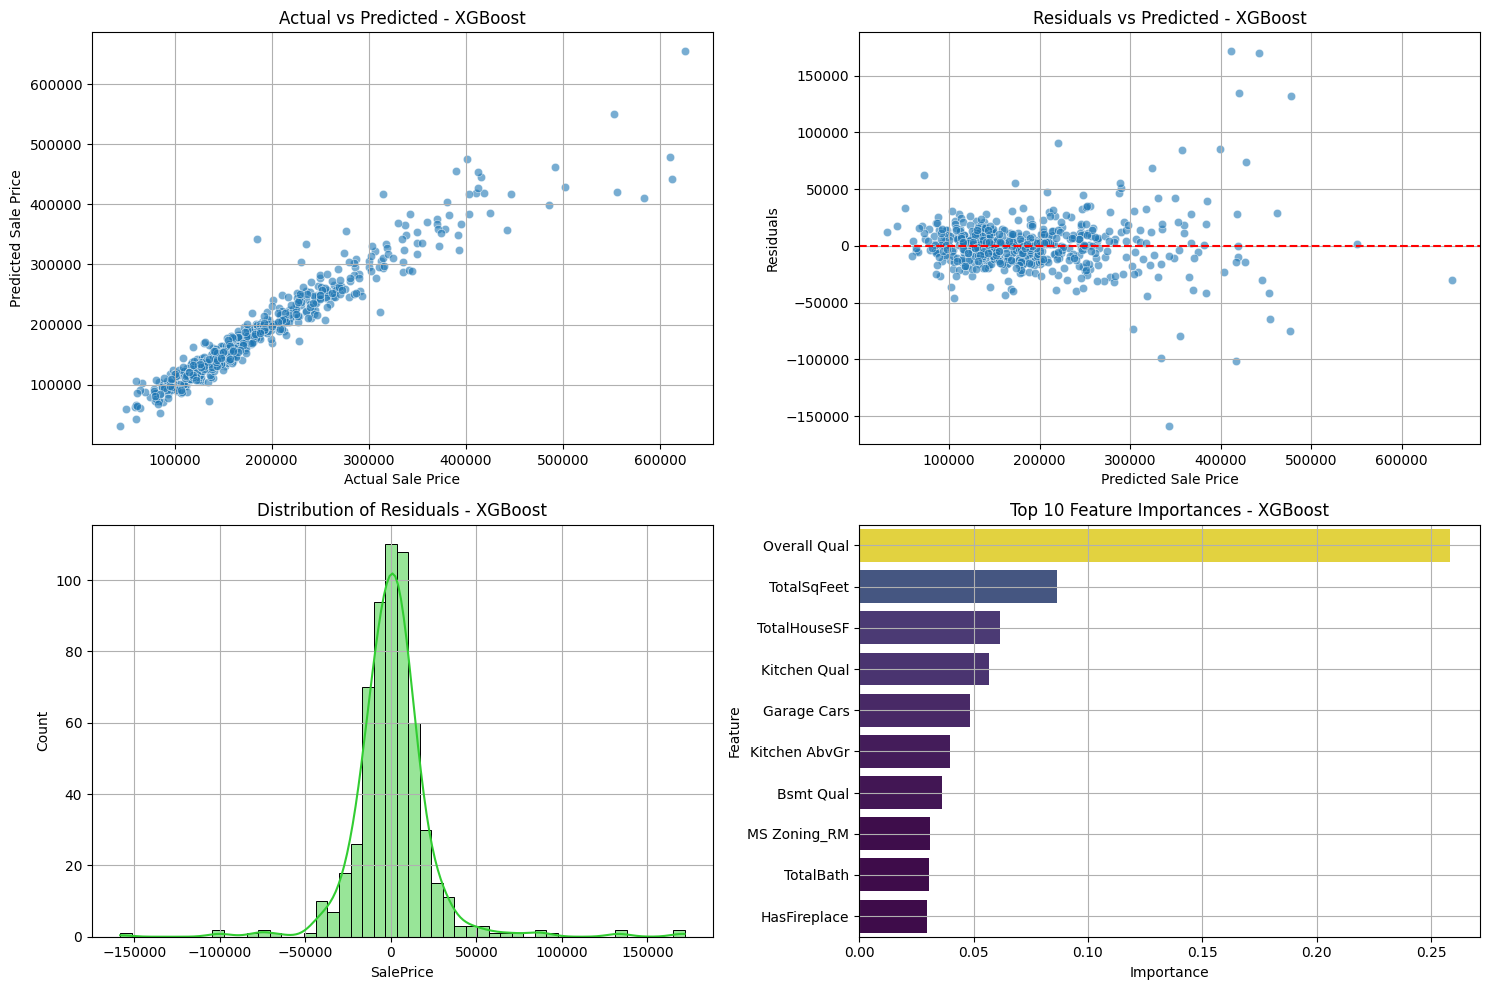

In [45]:
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted - XGBoost")
plt.grid(True)

# 2. Residuals
residuals_xgb = y_test - y_pred_xgb
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - XGBoost")
plt.grid(True)

# 3. Residual Distribution
plt.subplot(2, 2, 3)
sns.histplot(residuals_xgb, kde=True, color='limegreen')
plt.title("Distribution of Residuals - XGBoost")
plt.grid(True)

# 4. Feature Importances
plt.subplot(2, 2, 4)
importances = xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_feats = importance_df.sort_values(by='Importance', ascending=False).head(10)
top_feats['Hue'] = top_feats['Importance']

sns.barplot(
    x='Importance',
    y='Feature',
    hue='Hue',
    data=top_feats,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Feature Importances - XGBoost")
plt.grid(True)

plt.tight_layout()
plt.show()


#### **LightGBM Regressor** model

In [46]:
from lightgbm import LGBMRegressor

In [47]:
lgb_model = LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42, max_depth=4)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 145
[LightGBM] [Info] Start training from score 178582.207765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,4
,learning_rate,0.1
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [48]:
y_pred_lgb = lgb_model.predict(X_test)

In [49]:
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Regression Results:")
print(f"RMSE: {rmse_lgb:.2f}")
print(f"MAE : {mae_lgb:.2f}")
print(f"R²  : {r2_lgb:.2f}")

LightGBM Regression Results:
RMSE: 25738.38
MAE : 15058.70
R²  : 0.92


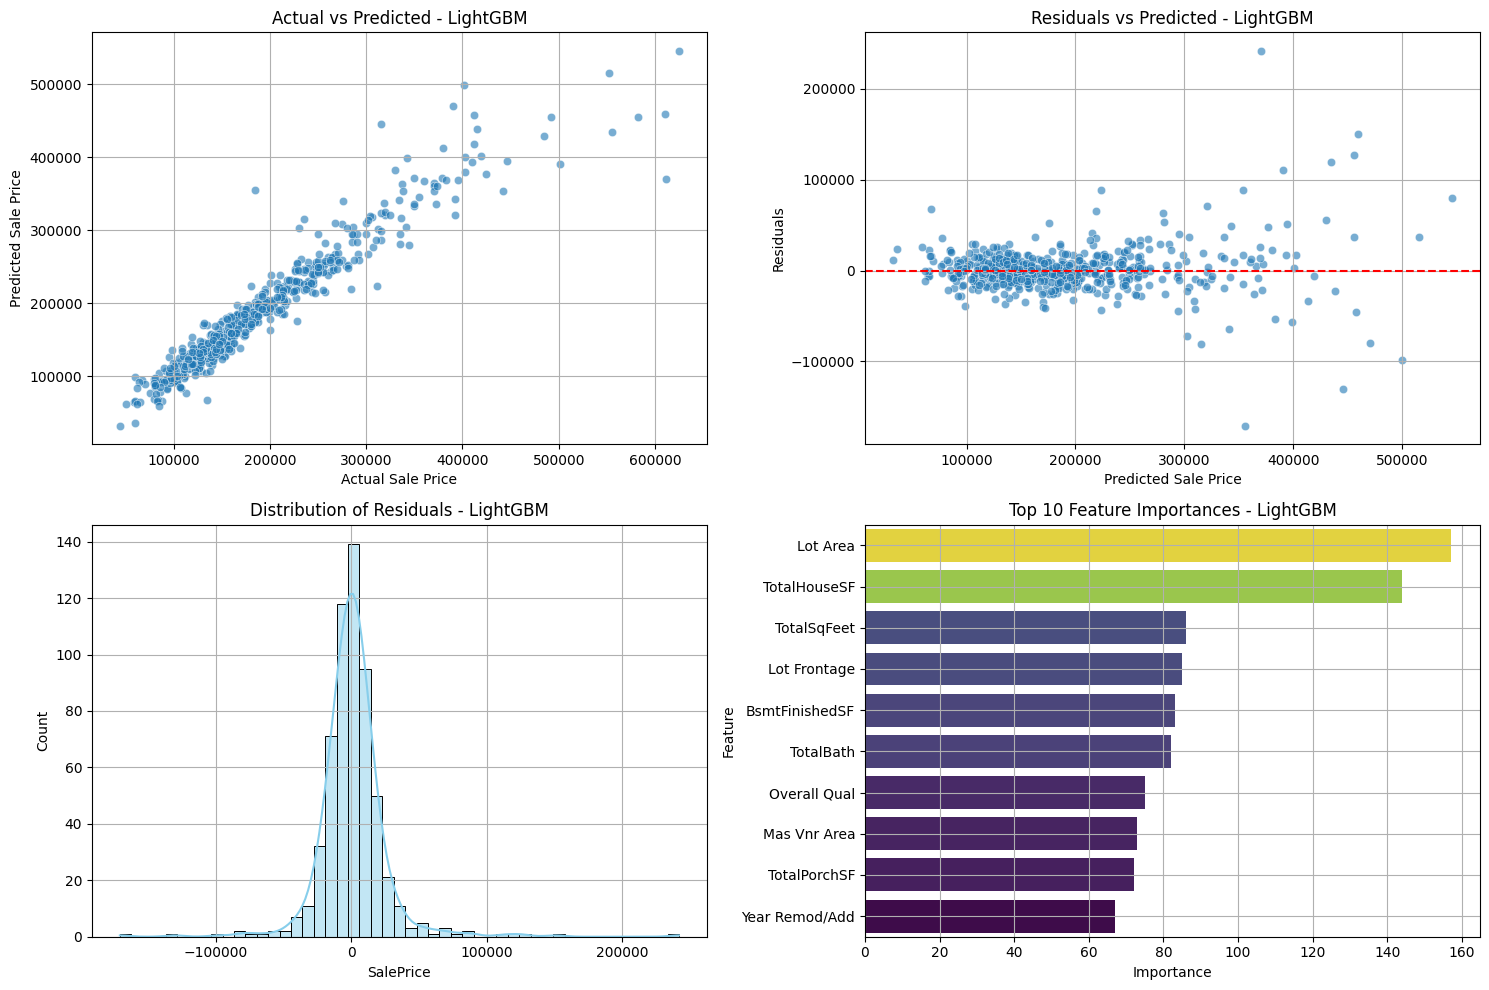

In [50]:
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lgb, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted - LightGBM")
plt.grid(True)

# 2. Residuals
residuals_lgb = y_test - y_pred_lgb
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_lgb, y=residuals_lgb, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - LightGBM")
plt.grid(True)

# 3. Residual Distribution
plt.subplot(2, 2, 3)
sns.histplot(residuals_lgb, kde=True, color='skyblue')
plt.title("Distribution of Residuals - LightGBM")
plt.grid(True)

# 4. Feature Importances
plt.subplot(2, 2, 4)
importances = lgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_feats = importance_df.sort_values(by='Importance', ascending=False).head(10)
top_feats['Hue'] = top_feats['Importance']

sns.barplot(
    x='Importance',
    y='Feature',
    hue='Hue',
    data=top_feats,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Feature Importances - LightGBM")
plt.grid(True)

plt.tight_layout()
plt.show()


##### Comparision

In [52]:
print("Decision Tree Regression")
print(f"RMSE:  {rmse_dt:.2f}")
print(f"MAE :  {mae_dt:.2f}")
print(f"R²  :  {r2_dt:.2f}")
print("-" * 30)

print("Gradient Boosting Regression")
print(f"RMSE:  {rmse_gbr:.2f}")
print(f"MAE :  {mae_gbr:.2f}")
print(f"R²  :  {r2_gbr:.2f}")
print("-" * 30)

print("XGBoost Regression")
print(f"RMSE:  {rmse_xgb:.2f}")
print(f"MAE :  {mae_xgb:.2f}")
print(f"R²  :  {r2_xgb:.2f}")
print("-" * 30)

print("LightGBM Regression")
print(f"RMSE:  {rmse_lgb:.2f}")
print(f"MAE :  {mae_lgb:.2f}")
print(f"R²  :  {r2_lgb:.2f}")
print("-" * 30)


Decision Tree Regression
RMSE:  38002.78
MAE :  23036.05
R²  :  0.82
------------------------------
Gradient Boosting Regression
RMSE:  25497.72
MAE :  14246.82
R²  :  0.92
------------------------------
XGBoost Regression
RMSE:  23895.88
MAE :  14357.24
R²  :  0.93
------------------------------
LightGBM Regression
RMSE:  25738.38
MAE :  15058.70
R²  :  0.92
------------------------------
